# 作业

用 3 层神经网络模型实现如下数据集的分类。用分类精度做评估指标。

### 人工神经网络(ANN) for Regression

- 人工神经网络（ANN）就是多层感知机 (MLC)
- 用 `Numpy` 库实现反向传播（BackproPagation) 梯度下降算法
- 做函数拟合

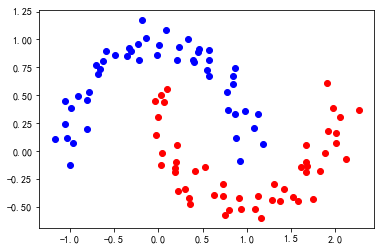

In [3]:
from sklearn.datasets.samples_generator import make_moons
m = 100
noise_ = 0.1
XX,yy = make_moons(n_samples=m, shuffle=True, noise=noise_, random_state=42)
plt.plot(XX[np.where(yy == 1),0],XX[(np.where(yy == 1)),1],'ro');
yy[yy == 0] = -1
plt.plot(XX[np.where(yy == -1),0],XX[(np.where(yy == -1)),1],'bo');

In [1]:
import pandas as pd  # 导入库
import numpy as np
from pylab import plot, xlabel, ylabel, legend, figure, contour
%matplotlib inline     
#上行具体作用：当调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，可以直接在python console里面生成图像。
import matplotlib # 注意这个也要import一次,原因不是很清楚
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 使用Matplotlib的字体管理器加载中文字体
my_font=fm.FontProperties(fname="C:\Windows\Fonts\simsunb.ttf")
plt.rcParams['font.sans-serif']=['SimHei']

#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False


## 1.1 三层 ANN 网络，即一层隐含层

#### 初始化重要参数
- 迭代次数和学习步长
- 各层神经元格式
- 随机初始化权重矩阵

In [4]:
#  activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# activation function 的导数
def sigmoid_derivative(x):
    return x * (1-x)

# 设置训练集的x和y

X = XX
y = yy.reshape(-1,1)

# 设定重要参数
n_iter = 100000 # 迭代次数
alpha = 0.1 # 学习步长

# 设定各层神经元个数
input_dimension = XX.shape[1]
hidden_layer_1_dimension = 20
output_dimension = y.shape[1]


# 随机初始化权重矩阵: 均值为0 方差为1 的正态分布
np.random.seed(42)
Omega1 = np.random.randn(input_dimension+1,hidden_layer_1_dimension)*6
Omega2 = np.random.randn(hidden_layer_1_dimension+1,output_dimension)*6   #均值为0 方差为6

# 储存每次迭代的loss function 值
J = np.empty(n_iter)
ii = np.empty(n_iter)


## 1.2 Training

In [36]:
# 开始训练
for i in np.arange(n_iter):
    
    # forward
    a1 = X
    a11 = np.insert(a1,0,values=1,axis=1)
    Z2 = np.dot(a11,Omega1)
    a2 = sigmoid(Z2)
    a21 = np.insert(a2,0,values=1,axis=1)
    Z3 = np.dot(a21,Omega2)
    a3 = Z3

    # 计算 cost function
    
    J[i] = np.dot((a3-y).T,(a3-y))/2/m
    ii[i] = i

   
    
    # backpropagation

    delta3 = a3 - y
    d_Omega2 = np.dot(a21.T,delta3)
    delta2 = np.dot(delta3,Omega2[1:,:].T)*(a2*(1-a2))
    d_Omega1 = np.dot(a11.T,delta2)

    # update weights

    Omega1 = Omega1 - alpha*d_Omega1/m 
    Omega2 = Omega2 - alpha*d_Omega2/m

## 1.3 输出结果

Loss Funciton: 0.006477929676924632
Training Err: 0.11382380837878016


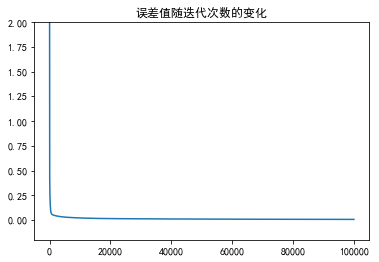

(-0.8, 1.25)

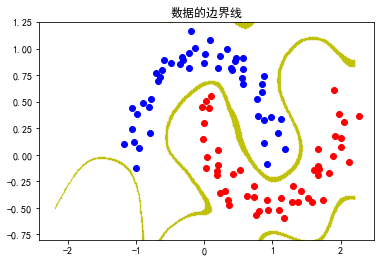

In [58]:
# 计算训练误差
print("Loss Funciton:",J[n_iter-1])
print("Training Err:",np.sqrt(2*J[n_iter-1]))

# cost function 值随迭代次数的变化
plot(ii,J)
plt.title("误差值随迭代次数的变化");
plt.ylim([-0.2,2])
plt.show()

# 拟合结果
plot(XX[np.where(yy == 1),0],XX[(np.where(yy == 1)),1],'ro');
plot(XX[np.where(yy == -1),0],XX[(np.where(yy == -1)),1],'bo');

def ANN3(X, Omega1, Omega2):
    a1 = X
    a11 = np.insert(a1,0,values=1,axis=1)
    Z2 = np.dot(a11,Omega1)
    a2 = sigmoid(Z2)
    a21 = np.insert(a2,0,values=1,axis=1)
    Z3 = np.dot(a21,Omega2)
    a3 = Z3
    return a3

X_boundary = np.linspace(-2.2, 2.2, 500)
Y_boundary = np.linspace(-2.2, 2.2, 500)
X_mesh, Y_mesh = np.meshgrid(X_boundary, Y_boundary)
#X_mesh, Y_mesh = X_mesh.reshape(-1, 1), Y_mesh.reshape(-1, 1)
X_mesh, Y_mesh = X_mesh.reshape(-1, 1), Y_mesh.reshape(-1)

XY_mesh = np.insert(X_mesh, 0, Y_mesh, axis = 1)

a3 = ANN3(XY_mesh, Omega1, Omega2)
plt.title("数据的边界线")
thresh = 0.1
XY_mesh, a3= np.delete(XY_mesh, (0), axis = 0), np.delete(a3, 0)
plot(XY_mesh[np.where((thresh > a3) & (a3 > -thresh)), 0], XY_mesh[np.where((thresh > a3) & (a3 > -thresh)), 1],'yo',markersize=0.4);
plt.ylim([-0.8, 1.25])

In [45]:
a.shape

AttributeError: 'tuple' object has no attribute 'shape'

## 1.4 Cross Validation

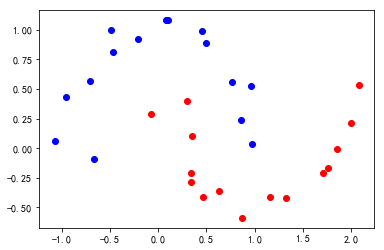

In [59]:
m = 30
noise_ = 0.1
XX_cv,yy_cv = make_moons(n_samples=m, shuffle=True, noise=noise_, random_state=42)
XX = XX_cv
yy = yy_cv
plt.plot(XX[np.where(yy == 1),0],XX[(np.where(yy == 1)),1],'ro');
yy[yy == 0] = -1
plt.plot(XX[np.where(yy == -1),0],XX[(np.where(yy == -1)),1],'bo');

(-0.8, 1.25)

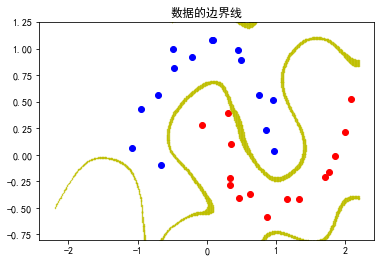

In [61]:
plot(XX[np.where(yy == 1),0],XX[(np.where(yy == 1)),1],'ro');
plot(XX[np.where(yy == -1),0],XX[(np.where(yy == -1)),1],'bo');
X_boundary = np.linspace(-2.2, 2.2, 500)
Y_boundary = np.linspace(-2.2, 2.2, 500)
X_mesh, Y_mesh = np.meshgrid(X_boundary, Y_boundary)
#X_mesh, Y_mesh = X_mesh.reshape(-1, 1), Y_mesh.reshape(-1, 1)
X_mesh, Y_mesh = X_mesh.reshape(-1, 1), Y_mesh.reshape(-1)

XY_mesh = np.insert(X_mesh, 0, Y_mesh, axis = 1)

a3 = ANN3(XY_mesh, Omega1, Omega2)
plt.title("数据的边界线")
thresh = 0.1
XY_mesh, a3= np.delete(XY_mesh, (0), axis = 0), np.delete(a3, 0)
plot(XY_mesh[np.where((thresh > a3) & (a3 > -thresh)), 0], XY_mesh[np.where((thresh > a3) & (a3 > -thresh)), 1],'yo',markersize=0.4);
plt.ylim([-0.8, 1.25])

### 1.4.1 计算误差

In [76]:
# 设置训练集的x和y

X = XX
y = yy.reshape(-1,1)
a3_cv = ANN3(X, Omega1, Omega2)
a3_cv[np.where(a3_cv > 0)] = 1
a3_cv[np.where(a3_cv < 0)] = -1

J = np.dot((a3_cv-y).T,(a3_cv-y))/2/m

Err = np.sqrt(2*J)
# 计算训练误差
print("Loss Funciton:",J.item())
print("Training Err:",Err.item())

Loss Funciton: 0.0
Training Err: 0.0


### 1.4.2 Confusion Matrix, Accuracy, Precision, Recall, F1_score

Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1-score: 1.0


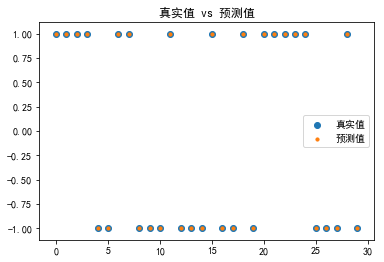

In [74]:
# Confusion Matrix
tp = len(np.where((a3_cv >= 0) & (y == 1))[0])
tn = len(np.where((a3_cv < 0) & (y == -1))[0])
fp = len(np.where((a3_cv < 0) & (y == 1))[0])
fn = len(np.where((a3_cv >= 0) & (y == -1))[0])

# 计算各类指标
Accuracy = (tp+tn)/m
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
F1_score = 2/(1/Recall + 1/Precision)

print("Training Accuracy:",Accuracy )
print("Training Precision:",Precision )
print("Training Recall:",Recall )
print("Training F1-score:",F1_score)
sequence = np.arange(y.shape[0])
plt.title("真实值 vs 预测值")
plt.scatter(sequence, y, label = "真实值");
plt.scatter(sequence, a3_cv,s = 10, label = "预测值");
plt.legend();

# 2 探究平移对学习的影响

构建一个sinpx函数，p为复杂度

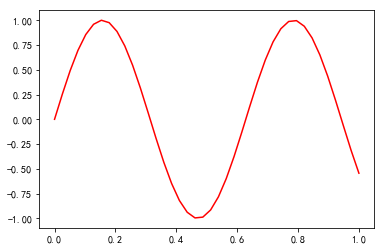

In [91]:
m=40 # 训练样本数
p=10
XX = np.linspace(0,1,m).reshape(-1,1)
yy = np.sin(p*XX)
plt.plot(XX,yy,'r-');

In [83]:
#  activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# activation function 的导数
def sigmoid_derivative(x):
    return x * (1-x)

# 设置训练集的x和y

X = XX
y = yy.reshape(-1,1)

# 设定重要参数
n_iter = 500 # 迭代次数
alpha = 0.1 # 学习步长
 
# 设定各层神经元个数
input_dimension = XX.shape[1]
hidden_layer_1_dimension = 20
output_dimension = yy.shape[1]


# 随机初始化权重矩阵: 均值为0 方差为1 的正态分布. Change this para, you can learn better. eg. omega = omega * 6
np.random.seed(42)


D = 20      #添加平移量


Omega1 = np.random.randn(input_dimension+1,hidden_layer_1_dimension) + D
Omega2 = np.random.randn(hidden_layer_1_dimension+1,output_dimension) + D

# 储存每次迭代的loss function 值
J = np.empty(n_iter)
ii = np.empty(n_iter)

# 开始训练
for i in np.arange(n_iter):
    
    # forward
    a1 = X
    a11 = np.insert(a1,0,values=1,axis=1)
    Z2 = np.dot(a11,Omega1)
    a2 = sigmoid(Z2)
    a21 = np.insert(a2,0,values=1,axis=1)
    Z3 = np.dot(a21,Omega2)
    a3 = Z3

    # 计算 cost function
    
    J[i] = np.dot((a3-y).T,(a3-y))/2/m
    ii[i] = i

   
    
    # backpropagation

    delta3 = a3 - y
    d_Omega2 = np.dot(a21.T,delta3)
    delta2 = np.dot(delta3,Omega2[1:,:].T)*(a2*(1-a2))
    d_Omega1 = np.dot(a11.T,delta2)

    # update weights

    Omega1 = Omega1 - alpha*d_Omega1/m 
    Omega2 = Omega2 - alpha*d_Omega2/m



Loss Funciton: 0.22000949832396505
Training Err: 0.6633392771786774


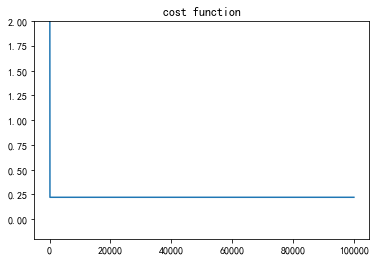

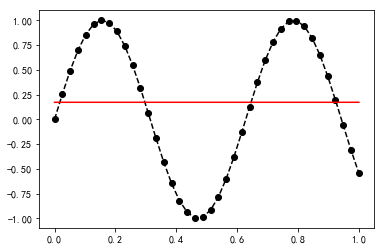

In [82]:
# 计算训练误差
print("Loss Funciton:",J[n_iter-1])
print("Training Err:",np.sqrt(2*J[n_iter-1]))

# cost function 值随迭代次数的变化
plot(ii,J)
plt.title("cost function");
plt.ylim([-0.2,2])
plt.show()

# 拟合结果
plot(XX,yy,'k--o');
plot(X,a3,"r-");

迭代次数取500

Loss Funciton: 0.22000957531019524
Training Err: 0.6633393932372708


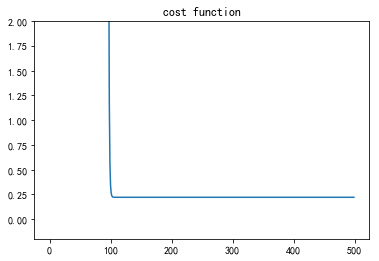

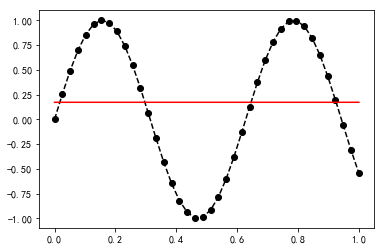

In [84]:
# 计算训练误差
print("Loss Funciton:",J[n_iter-1])
print("Training Err:",np.sqrt(2*J[n_iter-1]))

# cost function 值随迭代次数的变化
plot(ii,J)
plt.title("cost function");
plt.ylim([-0.2,2])
plt.show()

# 拟合结果
plot(XX,yy,'k--o');
plot(X,a3,"r-");

可以看到由于权重的平移导致误差值收缩到某一条线时便无法再动了

In [14]:
D = np.linspace(1,30,30)
J_= []

    
for u in range(30):
    #  activation function
    # 随机初始化权重矩阵: 均值为0 方差为1 的正态分布. Change this para, you can learn better. eg. omega = omega * 6
    np.random.seed(42)
    Omega1 = np.random.randn(input_dimension+1,hidden_layer_1_dimension) + D[u]
    Omega2 = np.random.randn(hidden_layer_1_dimension+1,output_dimension) + D[u]

    # 储存每次迭代的loss function 值
    J = np.empty(n_iter)
    ii = np.empty(n_iter)

    # 开始训练
    for i in np.arange(n_iter):
    
        # forward
        a1 = X
        a11 = np.insert(a1,0,values=1,axis=1)
        Z2 = np.dot(a11,Omega1)
        a2 = sigmoid(Z2)
        a21 = np.insert(a2,0,values=1,axis=1)
        Z3 = np.dot(a21,Omega2)
        a3 = Z3

        # 计算 cost function
    
        J[i] = np.dot((a3-y).T,(a3-y))/2/m
        ii[i] = i

   
    
        # backpropagation

        delta3 = a3 - y
        d_Omega2 = np.dot(a21.T,delta3)
        delta2 = np.dot(delta3,Omega2[1:,:].T)*(a2*(1-a2))
        d_Omega1 = np.dot(a11.T,delta2)

        # update weights

        Omega1 = Omega1 - alpha*d_Omega1/m 
        Omega2 = Omega2 - alpha*d_Omega2/m
    J_.append(np.sqrt(2*J[n_iter-1]))
    # 计算训练误差
    print("Loss Funciton:",J[n_iter-1])
    print("Training Err:",np.sqrt(2*J[n_iter-1]))


Loss Funciton: 0.013893147233148379
Training Err: 0.16669221477410623
Loss Funciton: 0.01115748260792885
Training Err: 0.1493819440757741
Loss Funciton: 0.013484570444326686
Training Err: 0.1642228391200608
Loss Funciton: 0.012629808419107814
Training Err: 0.158932743128078
Loss Funciton: 0.013801574615464414
Training Err: 0.16614195505930712
Loss Funciton: 0.012060632248902064
Training Err: 0.15531022019752636
Loss Funciton: 0.011873703379373705
Training Err: 0.1541019362589173
Loss Funciton: 0.010716451270157794
Training Err: 0.1463998037577769
Loss Funciton: 0.010205219707402253
Training Err: 0.14286510915827036
Loss Funciton: 0.010595500016224868
Training Err: 0.14557128848935058
Loss Funciton: 0.01028083348232114
Training Err: 0.14339339930639164
Loss Funciton: 0.008895925258317384
Training Err: 0.13338609566455856
Loss Funciton: 0.007802154589725345
Training Err: 0.12491720930060314
Loss Funciton: 0.00717822598412472
Training Err: 0.11981841247591891
Loss Funciton: 0.006974912857

Text(0, 0.5, '平移距离')

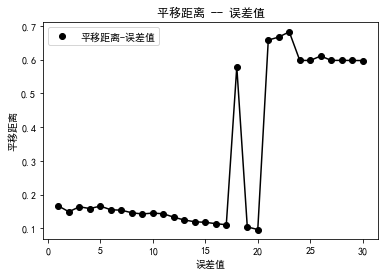

In [15]:
fig3, = plot(D,J_,'ko');             #加逗号是为了输出图例
legend(handles=[fig3], labels=['平移距离-误差值'])           #输出图例
fig3, = plot(D,J_,'k-'); 
#legend(handles=[fig1,fig2,fig3], labels=['sinc','fitting result','data'])
plt.title("平移距离 -- 误差值")
xlabel("误差值")
ylabel("平移距离")

Text(0, 0.5, '误差值')

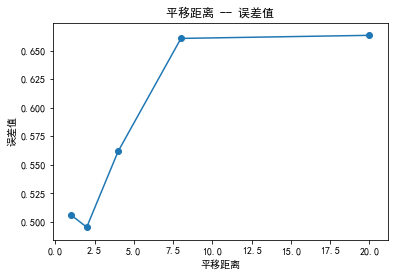

In [90]:
trans_findBest = np.array([1, 2, 4, 8, 20])
Accuracy_findBest = np.array([0.506, 0.4953, 0.5617, 0.6606, 0.6633])

plt.title("平移距离 -- 误差值")
plt.plot(trans_findBest, Accuracy_findBest, )
plt.scatter(trans_findBest, Accuracy_findBest)
plt.xlabel("平移距离")
plt.ylabel("误差值")

可以看到虽然平移距离能够带来短暂的误差值下降，但是会带来更大的误差值（因为权重的平移导致误差值永远停留在了一条水平线，无法继续学习），最后只能停留在一个距离正确位置一定平移距离的相对正确位置

但是根据这个可以有所启发，就是先通过平移更快的找到平移位置，然后迭代后再平移会去，得到正确的权重，不过由于时间问题，6.30无法完成这个了，可能得明天才能尝试这种操作的可行性。